In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import gmaps
import requests
import folium
from folium import plugins
from config import (api_key, gkey)

In [2]:
windcapdf = pd.read_csv("Output/windcap.csv", encoding = "ISO-8859-1")
usdf = pd.read_csv("Output/US.csv", encoding = "ISO-8859-1")
netgendf = pd.read_csv("Output/NetGenSpecific.csv", encoding = "ISO-8859-1")
coaldf = pd.read_csv("Output/coal.csv", encoding = "ISO-8859-1")
wind_df = pd.read_csv('Output/clean_turbine_data.csv')
state_df = pd.read_csv("Output/state_electricity_prices.csv", encoding = "ISO-8859-1")
cap_by_state_df = pd.read_csv("Output/p_cap_state_pop_ctrl.csv", encoding = "ISO-8859-1")
heatmapwndcapdf = pd.read_csv("Output/HeatMapWindCap.csv")
stlatlongWpopdf = pd.read_csv('Output/statelatlongWPop.csv')

# Scatter Plot: Capacity built by Year MW
The United States Wind Turbine Database (USWTDB) (USGS)
Attrib: "Map services and data are available from U.S. Wind Turbine Database, provided by the U.S. Geological Survey, American Wind Energy Association, and Lawrence Berkeley National Laboratory via https://eerscmap.usgs.gov/uswtdb"
Graph 1  

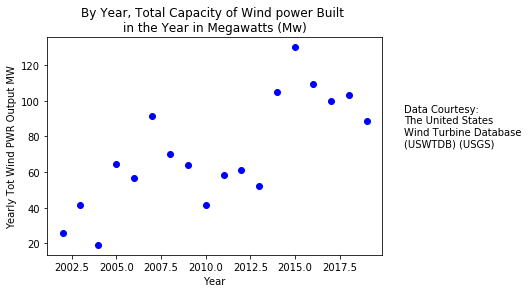

In [3]:
x_axis = windcapdf["p_year"]
y_axis = windcapdf["p_cap"]

plt.scatter(x_axis,y_axis, marker='o', color='blue' )
plt.title("By Year, Total Capacity of Wind power Built \nin the Year in Megawatts (Mw)")
plt.xlabel('Year')
plt.ylabel('Yearly Tot Wind PWR Output MW')
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS)"
plt.figtext(.95,.50,text)

plt.savefig('output/Gr01_MWCapacityBuiltByYearScatr.png')
plt.show()

Same data, line graph..  This better tells the story.

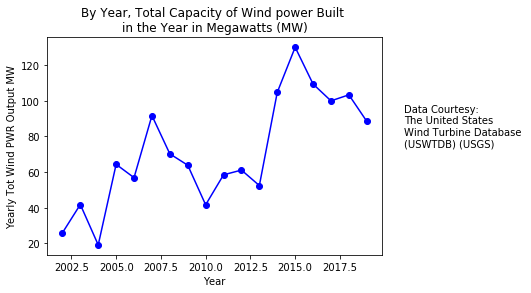

In [4]:
x_axis = windcapdf["p_year"]
y_axis = windcapdf["p_cap"]

plt.plot(x_axis,y_axis, marker='o', color='blue' )
plt.title("By Year, Total Capacity of Wind power Built \nin the Year in Megawatts (MW)")
plt.xlabel('Year')
plt.ylabel('Yearly Tot Wind PWR Output MW')
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS)"
plt.figtext(.95,.50,text)
plt.savefig('output/Gr02_MWCapacityBuiltByYearLine.png')
plt.show()

# Capacity vs Price by Year
Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government
https://www.eia.gov/opendata/qb.php?category=40&sdid=ELEC.PRICE.US-ALL.A.eia.goveia.gov


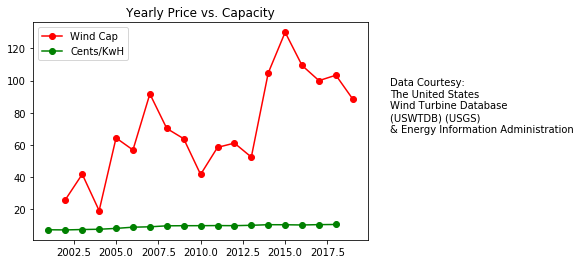

In [5]:
fig, cap = plt.subplots()
x_axisWnd = windcapdf["p_year"]
y_axisWnd = windcapdf["p_cap"]
wind_handle, = plt.plot(x_axisWnd, y_axisWnd, marker='o', color='red', label="Wind Cap" )
xus = usdf["Year"]
yus = usdf["Cents/KwH"]
plt.title("Yearly Price vs. Capacity")
ushandle, = plt.plot(xus, yus, marker='o', color='green', label="Cents/KwH" )
plt.legend()
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information Administration"
plt.figtext(.95,.50,text)

plt.savefig('output/Gr03_yearlyPriceVsCap.png')
plt.show()

Same data with two scales.  This tells story. 
Note: We had to discover function cumsum to get the sum of all the wind caps

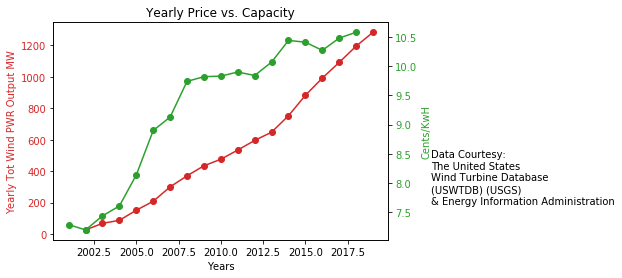

In [6]:
fig, cap = plt.subplots()
x_axisWnd = windcapdf["p_year"]
y_axisWnd = windcapdf["p_cap"]
CumCapWnd = windcapdf.cumsum(axis = 0)
y_axisWnd = CumCapWnd["p_cap"]
xus = usdf["Year"]
yus = usdf["Cents/KwH"]
plt.title("Yearly Price vs. Capacity")
cap.set_xlabel("Years")
cap.set_ylabel("Yearly Tot Wind PWR Output MW", color = "tab:red")
cap.plot(x_axisWnd, y_axisWnd, color = "tab:red", marker = "o")
cap.tick_params(axis = "y", labelcolor = "tab:red")
cents = cap.twinx()
cents.set_ylabel("Cents/KwH", color = "tab:green")
cents.plot(xus, yus, color = "tab:green", marker = "o")
cents.tick_params(axis = "y", labelcolor = "tab:green")
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information Administration"
plt.figtext(1.0,.25,text)

plt.savefig('output/Gr04_yearlyPriceVsCap2Scale.png')

In [7]:
(t_stat, p) = stats.ttest_ind(x_axisWnd, y_axisWnd, equal_var=False)
print(f't-stat: {t_stat} p-value: {p}')

t-stat: 15.383254122084262 p-value: 2.0619021659484267e-11


Price normalized
graph 5

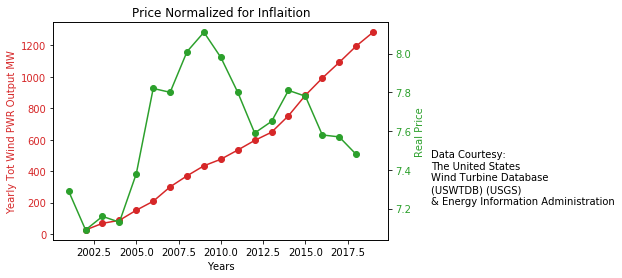

In [8]:
fig, cap = plt.subplots()
yus = usdf["Real Price"]
plt.title("Price Normalized for Inflaition")
cap.set_xlabel("Years")
cap.set_ylabel("Yearly Tot Wind PWR Output MW", color = "tab:red")
cap.plot(x_axisWnd, y_axisWnd, color = "tab:red", marker = "o")
cap.tick_params(axis = "y", labelcolor = "tab:red")
cents = cap.twinx()
cents.set_ylabel("Real Price", color = "tab:green")
cents.plot(xus, yus, color = "tab:green", marker = "o")
cents.tick_params(axis = "y", labelcolor = "tab:green")
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information Administration"
plt.figtext(1.0,.25,text)

plt.savefig('output/Gr05_yearlyPriceNormlVsCap2Scale.png')

In [9]:
(t_stat, p) = stats.ttest_ind(xus, yus, equal_var=False)
print(f't-stat: {t_stat} p-value: {p}')

t-stat: 1588.298651302741 p-value: 1.1324850360502994e-45


# Look into fossil fuel relationships
Coal
Coal Consumption for Electricity Generation and Useful Thermal Output Electric Power Sector Annual
https://www.eia.gov/opendata/qb.php?sdid=TOTAL.CLEIPUS.A

Graph 6

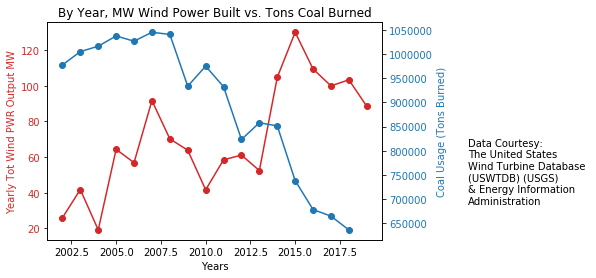

In [10]:
fig, cap = plt.subplots()
x_axisWnd = windcapdf["p_year"]
y_axisWnd = windcapdf["p_cap"]
xcoal = coaldf["Year"]
ycoal = coaldf["Tons Burned"]
plt.title("By Year, MW Wind Power Built vs. Tons Coal Burned")
cap.set_xlabel("Years")
cap.set_ylabel("Yearly Tot Wind PWR Output MW", color = "tab:red")
cap.plot(x_axisWnd, y_axisWnd, color = "tab:red", marker = "o")
cap.tick_params(axis = "y", labelcolor = "tab:red")
coal = cap.twinx()
coal.set_ylabel("Coal Usage (Tons Burned)", color = "tab:blue")
coal.plot(xcoal, ycoal, color = "tab:blue", marker = "o")
coal.tick_params(axis = "y", labelcolor = "tab:blue")
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information \nAdministration"
plt.figtext(1.1,.25,text)

plt.savefig('output/Gr06_WindPwrBuiltVsTonsCoalBurned.png')
plt.show()

Compare windpower output agains coal burned.
Graph 7

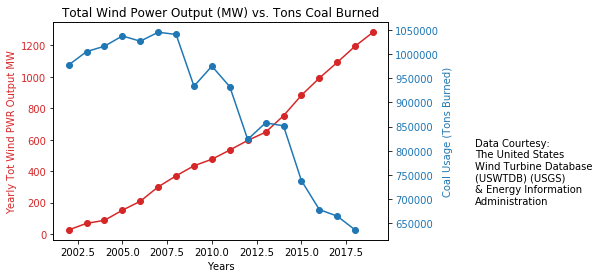

In [11]:
CumCapWnd = windcapdf.cumsum(axis = 0)
y_axisWnd = CumCapWnd["p_cap"]
fig, cap = plt.subplots()
plt.title("Total Wind Power Output (MW) vs. Tons Coal Burned")
cap.set_xlabel("Years")
cap.set_ylabel("Yearly Tot Wind PWR Output MW", color = "tab:red")
cap.plot(x_axisWnd, y_axisWnd, color = "tab:red", marker = "o")
cap.tick_params(axis = "y", labelcolor = "tab:red")
coal = cap.twinx()
coal.set_ylabel("Coal Usage (Tons Burned)", color = "tab:blue")
coal.plot(xcoal, ycoal, color = "tab:blue", marker = "o")
coal.tick_params(axis = "y", labelcolor = "tab:blue")
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information \nAdministration"
plt.figtext(1.1,.25,text)

plt.savefig('output/Gr07_WndPwrOutputVsTCoalBurned.png')
plt.show()

In [12]:
(t_stat, p) = stats.ttest_ind(xcoal, ycoal, equal_var=False)
print(f't-stat: {t_stat} p-value: {p}')

t-stat: -25.930307051498886 p-value: 1.690295317741054e-14


# Pie chart
2001 net generation by type (to compare to next pie chart)
Graph 8

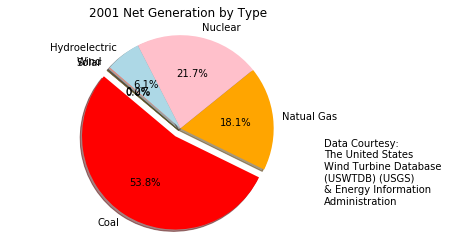

In [13]:
labels = ["Coal", "Natual Gas", "Nuclear", "Hydroelectric", "Wind", "Solar"]
colors = ["red", "orange", "pink", "lightblue", "lightcoral", "yellow"]
explode = (0.1, 0, 0, 0, 0, 0)
plt.pie(netgendf["2001"],explode = explode , labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("2001 Net Generation by Type")
plt.axis("equal")
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information \nAdministration"
plt.figtext(.85,.25,text)

plt.savefig('output/Gr08_PieNetGenByType2001.png')
plt.show()

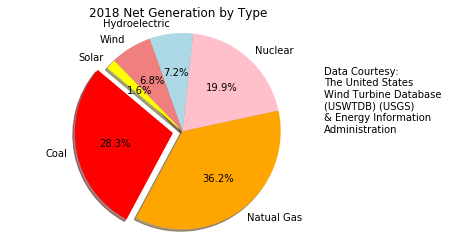

In [14]:
labels = ["Coal", "Natual Gas", "Nuclear", "Hydroelectric", "Wind", "Solar"]
colors = ["red", "orange", "pink", "lightblue", "lightcoral", "yellow"]
explode = (0.1, 0, 0, 0, 0, 0)
plt.pie(netgendf["2018"],explode = explode , labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("2018 Net Generation by Type")
text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information \nAdministration"
plt.figtext(.85,.50,text)

plt.savefig('output/Gr09_PieNetGenByType2018.png')
plt.show()

In [15]:
wind_df.rename(columns={'t_state':'State'}, 
                 inplace=True)
wind_df.head()

,case_id,State,p_name,p_year,p_tnum,p_cap,xlong,ylat
0,3000012,TX,Loraine II,2011.0,100,150.000,-100.710289,32.454193
1,3000020,AK,Tuntutuliak,2012.0,5,0.475,-162.661880,60.336800
2,3000078,CA,Oasis Power Partners,2004.0,60,60.000,-118.296288,35.067696
3,3000086,CA,San Gorgonio Farms Wind Farm,2008.0,112,31.000,-116.630142,33.923340
4,3000201,TX,Panhandle Wind 1,2014.0,118,218.300,-101.213791,35.410393


In [16]:
groupyear = wind_df.groupby(["State"]).sum()["p_cap"]
groupyeardf = pd.DataFrame(groupyear)

groupyeardf.head()

,p_cap
State,
AK,63.691
AR,0.100
AZ,268.300
CA,4499.905
CO,3426.110


In [17]:
groupstate = state_df.groupby(["State"]).mean()["Real Price"]
group_state_df = pd.DataFrame(groupstate)
group_state_df.head()

,Real Price
State,
AK,11.999444
AL,6.596111
AR,5.870000
AZ,7.477222
CA,11.045000


In [18]:
state_avg_df = pd.merge(group_state_df, groupyeardf, on='State')
state_avg_df = state_avg_df.reset_index()
cap_by_state_df['cap/person'] = cap_by_state_df['cap/person'] * 10000

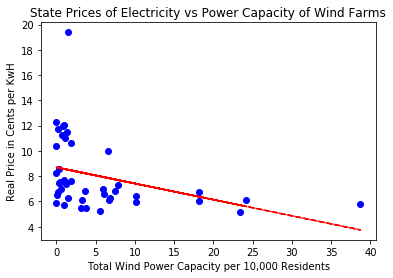

In [19]:
y_axis = cap_by_state_df["Real Price"]
x_axis = cap_by_state_df["cap/person"]

plt.scatter(x_axis,y_axis, marker='o', color='blue' )

# Add in trend line
z = np.polyfit(x_axis, y_axis, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")

plt.title("State Prices of Electricity vs Power Capacity of Wind Farms")
plt.ylabel('Real Price in Cents per KwH')
plt.xlabel('Total Wind Power Capacity per 10,000 Residents')
# text = "Data Courtesy: \nThe United States \nWind Turbine Database \n(USWTDB) (USGS) \n& Energy Information \nAdministration"
# plt.figtext(.02,.50,text)

plt.savefig('output/Gr10_StatePriceVsPwrCapWndFrms.png')
plt.show()

In [20]:
# Run t-test
(t_stat, p) = stats.ttest_ind(x_axis, y_axis, equal_var=False)
print(f't-stat: {t_stat} p-value: {p}')
# at alpha = .05 we cannot reject the null hypothesis of no relationship between more wind turbine capacity and lower energy prices

t-stat: -1.9587358422035732 p-value: 0.055646483075883664


In [21]:
sorted_cap_df = cap_by_state_df.sort_values(by='cap/person', ascending=False)
five_highest_df = sorted_cap_df.head(5)
five_lowest_df = sorted_cap_df.tail(5)
five_lowest_df

,Unnamed: 0,State,Population,Real Price,p_cap,cap/person
34,34,TN,6770010.0,6.510000,27.0,0.039882
6,6,DE,967171.0,8.284444,2.0,0.020679
5,5,CT,3572665.0,12.306667,5.1,0.014275
23,23,NJ,8908520.0,10.351111,9.0,0.010103
2,2,AR,3013825.0,5.870000,0.1,0.000332


In [22]:
five_highest_df

,Unnamed: 0,State,Population,Real Price,p_cap,cap/person
27,27,ND,760077.0,5.827778,2943.470,38.725945
11,11,IA,3156145.0,6.078889,7626.538,24.164093
41,41,WY,577737.0,5.158333,1352.820,23.415845
12,12,KS,2911505.0,6.750000,5301.433,18.208566
29,29,OK,3943079.0,6.015000,7163.325,18.166831


# Heatmap of wind turbine locations


In [23]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Setup for heat map
windlocations = heatmapwndcapdf[["ylat", "xlong"]] #- x,y's

windweightValue = heatmapwndcapdf['p_cap']

In [24]:
fig = gmaps.figure()

wind_layer = gmaps.heatmap_layer(windlocations, weights=windweightValue, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(wind_layer)

fig


Figure(layout=FigureLayout(height='420px'))

# Folium


In [25]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
ftime_map = folium.Map([38.3046615,-92.437099], zoom_start=3)

lstYears = np.arange(start=2002, stop=2020, step=1)

lstYears


# Nested list that contains the latitud and the longitud of the different accidents. 
year_list = [[] for _ in lstYears]
year_list
for lat,log,year in zip(wind_df.ylat, wind_df.xlong, wind_df.p_year):
    iyear = int(year) - 2002 # Zero based
    year_list[iyear].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' year' for i in lstYears]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(year_list, index).add_to(ftime_map)

ftime_map